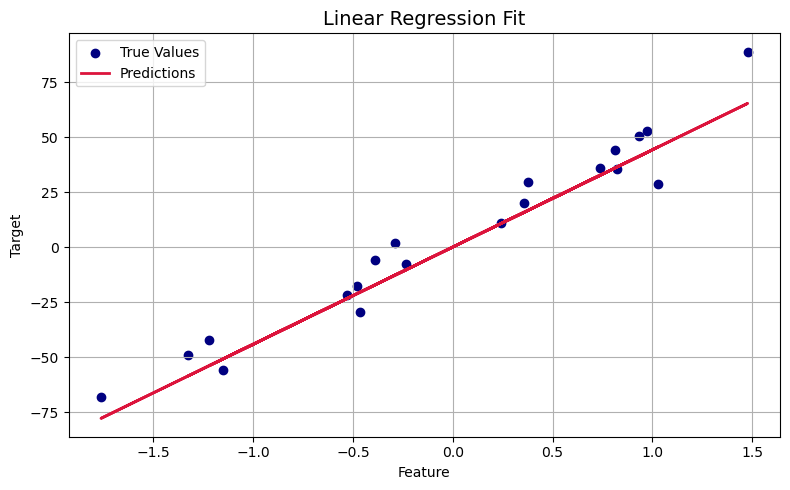

In [21]:
# linear_model_analysis
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create synthetic dataset
features, labels = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split data into training and test sets
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize and train linear regression model
lin_regressor = LinearRegression()
lin_regressor.fit(X_train, y_train)

# Generate predictions on test data
predictions = lin_regressor.predict(X_val)

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(X_val, y_val, c='navy', label='True Values')
plt.plot(X_val, predictions, c='crimson', linewidth=2, label='Predictions')
plt.title('Linear Regression Fit', fontsize=14)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

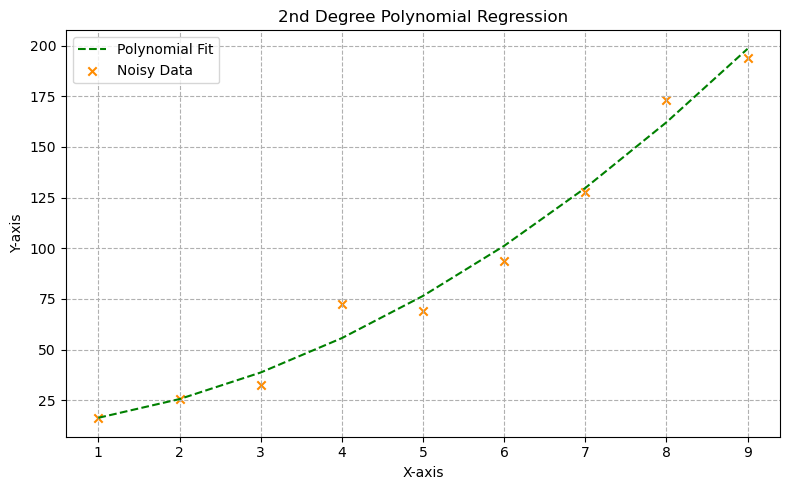

In [3]:
# poly_regression_fit.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Create input and output data
input_vals = np.linspace(1, 9, 9).reshape(-1, 1)
output_vals = 2 * input_vals.ravel()**2 + 3 * input_vals.ravel() + 5 + np.random.normal(0, 10, input_vals.shape[0])

# Transform the input for polynomial regression
poly_builder = PolynomialFeatures(degree=2)
transformed_input = poly_builder.fit_transform(input_vals)

# Train polynomial regression model
regressor = LinearRegression()
regressor.fit(transformed_input, output_vals)

# Predict on the same inputs
fitted_curve = regressor.predict(transformed_input)

# Plotting (different style)
plt.figure(figsize=(8, 5))
plt.plot(input_vals, fitted_curve, 'g--', label='Polynomial Fit')
plt.scatter(input_vals, output_vals, c='darkorange', marker='x', label='Noisy Data')
plt.title('2nd Degree Polynomial Regression')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

In [23]:
# regularized_models
from sklearn.linear_model import Ridge, Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Create synthetic regression data
data, target = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2, random_state=42)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(train_x, train_y)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(train_x, train_y)

# Display model scores
print(f"[Ridge Regression] Test R^2 Score : {ridge_model.score(test_x, test_y):.4f}")
print(f"[Lasso Regression] Test R^2 Score : {lasso_model.score(test_x, test_y):.4f}")

[Ridge Regression] Test R^2 Score : 0.8730
[Lasso Regression] Test R^2 Score : 0.8740


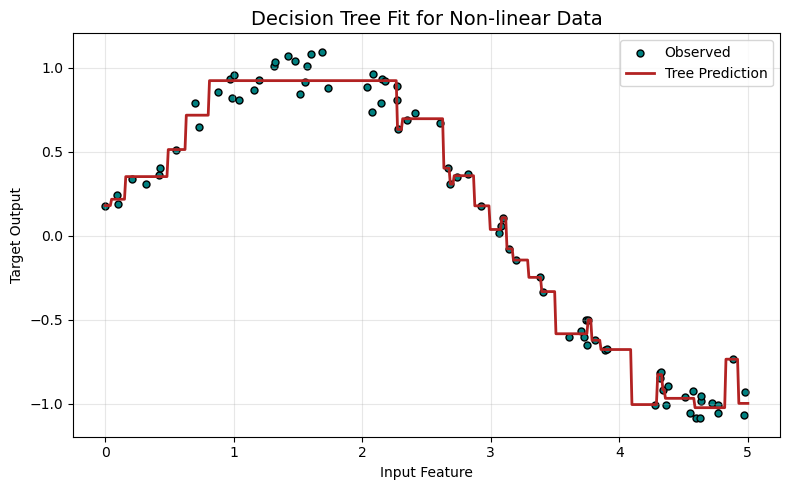

In [25]:
# tree_based_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Generate synthetic dataset
inputs = np.sort(5 * np.random.rand(80, 1), axis=0)
outputs = np.sin(inputs).flatten() + np.random.normal(0, 0.1, 80)

# Initialize and train decision tree regressor
dt_model = DecisionTreeRegressor(max_depth=5)
dt_model.fit(inputs, outputs)

# Generate test input and predictions
eval_points = np.linspace(0, 5, 500).reshape(-1, 1)
predicted_curve = dt_model.predict(eval_points)

# Visualization with different style
plt.figure(figsize=(8, 5))
plt.scatter(inputs, outputs, s=25, color="teal", edgecolors="black", label="Observed")
plt.plot(eval_points, predicted_curve, color="firebrick", linestyle='-', linewidth=2, label="Tree Prediction")
plt.title("Decision Tree Fit for Non-linear Data", fontsize=14)
plt.xlabel("Input Feature")
plt.ylabel("Target Output")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

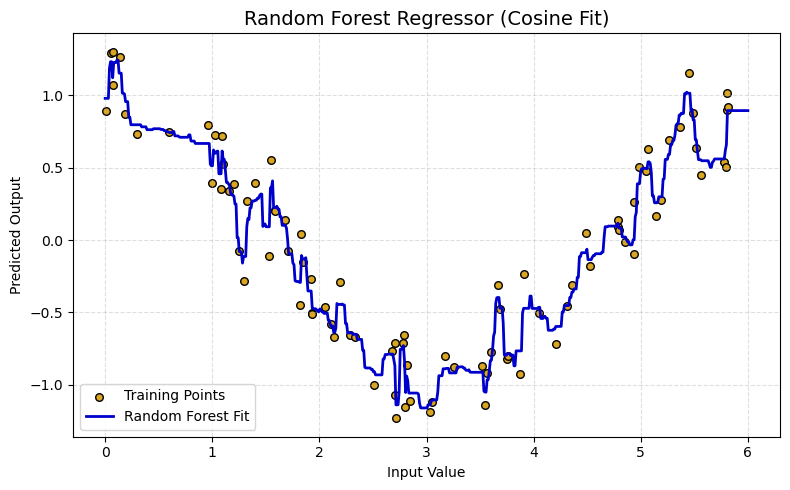

In [9]:
# ensemble_forest_regressor.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Generate a different range and more variation in the data
X_vals = np.sort(6 * np.random.rand(90, 1), axis=0)
y_vals = np.cos(X_vals).ravel() + np.random.normal(0, 0.2, 90)  # Different function & noise

# Build and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_vals, y_vals)

# Test data for prediction
test_range = np.linspace(0, 6, 600).reshape(-1, 1)
forest_preds = rf_model.predict(test_range)

# Plot the results
plt.figure(figsize=(8, 5))
plt.scatter(X_vals, y_vals, s=30, color="goldenrod", edgecolor="black", label="Training Points")
plt.plot(test_range, forest_preds, color="mediumblue", linewidth=2, label="Random Forest Fit")
plt.title("Random Forest Regressor (Cosine Fit)", fontsize=14)
plt.xlabel("Input Value")
plt.ylabel("Predicted Output")
plt.legend()
plt.grid(alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()

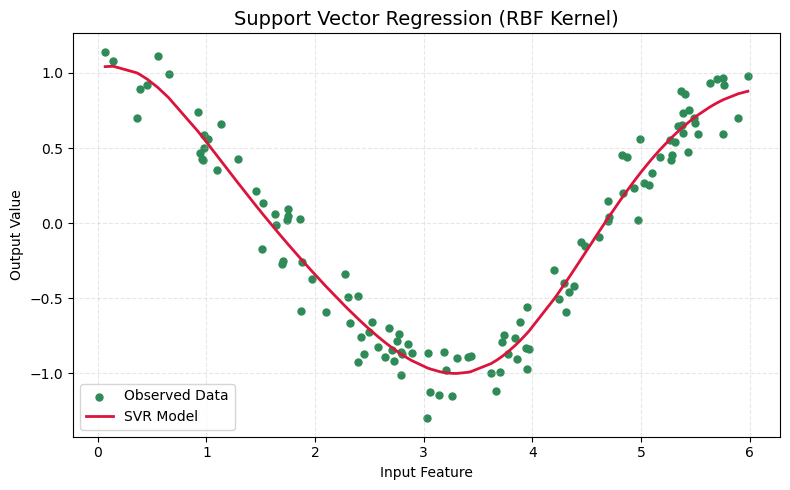

In [27]:
# support_vector_fit
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Generate data: different function (cosine), slightly different domain and more data points
features = np.sort(6 * np.random.rand(120, 1), axis=0)
targets = np.cos(features).ravel() + np.random.normal(0, 0.15, 120)

# Support Vector Regression model with RBF kernel
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(features, targets)

# Predict on training data (or use test set if available)
svr_predictions = svr_model.predict(features)

# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(features, targets, color='seagreen', label='Observed Data', s=25)
plt.plot(features, svr_predictions, color='crimson', linewidth=2, label='SVR Model')
plt.title('Support Vector Regression (RBF Kernel)', fontsize=14)
plt.xlabel('Input Feature')
plt.ylabel('Output Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

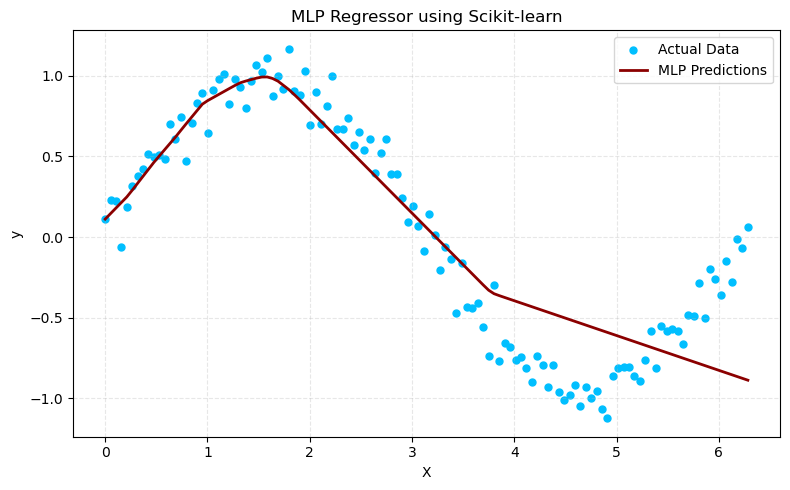

In [19]:
# mlp_regression_sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Create data using sine function with noise
X_vals = np.linspace(0, 2 * np.pi, 120).reshape(-1, 1)
y_vals = np.sin(X_vals).ravel() + np.random.normal(0, 0.1, 120)

# Initialize MLPRegressor (Neural Network)
mlp = MLPRegressor(hidden_layer_sizes=(50, 50),
                   activation='relu',
                   solver='adam',
                   max_iter=2000,
                   random_state=1)

# Train the model
mlp.fit(X_vals, y_vals)

# Predict
predictions = mlp.predict(X_vals)

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(X_vals, y_vals, color='deepskyblue', label='Actual Data', s=25)
plt.plot(X_vals, predictions, color='darkred', label='MLP Predictions', linewidth=2)
plt.title('MLP Regressor using Scikit-learn')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()